# YOLOv8

[https://github.com/ultralytics/ultralytics](https://github.com/ultralytics/ultralytics)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2, random, tempfile, requests
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax

def show_imgs(imgs_dict:dict, ncol=0, dpi=200, font_scale=0.7):
    font_size = int(plt.rcParams["font.size"]*font_scale)

    if ncol > 0:
        nrow = ((len(imgs_dict)-1)//ncol)+1
    else:
        nrow = 1
        ncol = len(imgs_dict)

    img_num = len(imgs_dict)
    fig = plt.figure(figsize=(float(img_num), float(img_num)), dpi=dpi)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrow, ncol), axes_pad=0.2,)

    for i in range(nrow*ncol):
        grid[i].axis('off')
        if i < len(imgs_dict):
            img_key = list(imgs_dict.keys())[i]
            grid[i].imshow(cv2.cvtColor(imgs_dict[img_key], cv2.COLOR_BGR2RGB))
            grid[i].set_title(img_key, fontsize=font_size, color='black', pad=int(font_size/2))
    
    plt.show(); plt.close()
    return None

def imread_web(url):
    res = requests.get(url)
    img = None
    with tempfile.NamedTemporaryFile(dir='./') as fp:
        fp.write(res.content)
        fp.file.seek(0)
        img = cv2.imread(fp.name)
    return img

/home/sentan2023/anaconda3/envs/hirahara/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 検出モデルを選ぶ

In [2]:
model_size = ["n", "s", "m", "l", "x"][0]

### 通常の物体検出モデル
# model = YOLO(f"./models/yolov8{model_size}.pt")

### インスタンスセグメンテーションのモデル
# model = YOLO(f"./models/yolov8{model_size}-seg.pt")

### Keypoint検出（骨格検出）のモデル
model = YOLO(f"./models/yolov8{model_size}-pose")


# 自作モデル
# model = YOLO(f"./__output_yolov8__/20230615-1346_yolov8n_nakane_grape1/weights/best.pt")



100%|██████████| 6.49M/6.49M [00:00<00:00, 11.6MB/s]


## ローカルのサンプルデータで実行


WARNING ⚠️ PoseModel has not supported augment inference yet! Now using single-scale inference instead.
0: 512x640 1 person, 9.4ms
Speed: 1.4ms preprocess, 9.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


{0: 'person'}


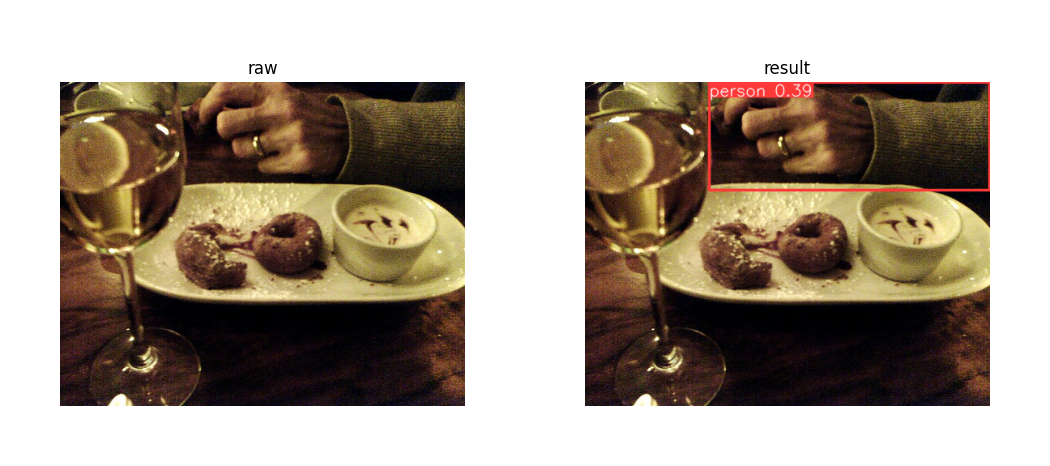

In [11]:
imgs = {}

# img_dir = Path("./yolo_datasets/nakane_grape1/train/images/")
img_dir = Path("./sample_data/")

sample_imgPath = random.choice(list(img_dir.glob("*.jpg")))

img = cv2.imread(str(sample_imgPath))
imgs["raw"] = cv2.imread(str(sample_imgPath))

print(model.names)

result = model(
                source    = imgs["raw"],
                conf      = 0.1,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )


imgs["result"] = result[0].plot()

show_imgs(imgs, dpi=600, font_scale=0.2)


## ネット上の写真で実行

In [ ]:
imgs = {}

# sample_img_url = "https://gahag.net/img/201607/05s/gahag-0103196580-1.jpg"
sample_img_url = "https://imgs.ototoy.jp/news/image.php/110902/0"
imgs["raw"] = imread_web(sample_img_url)

print(model.names)

result = model(
                source    = imgs["raw"],
                conf      = 0.1,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )


imgs["result"] = result[0].plot()

show_imgs(imgs, dpi=600, font_scale=0.2)